# Lab 2 Report:
## Iris Classification with Regression

### Name:

In [17]:
# Import neccessary packages

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch

In [18]:
from IPython.display import Image # For displaying images in colab jupyter cell

In [19]:
Image('lab2_exercise1.PNG', width = 1000)

FileNotFoundError: No such file or directory: 'lab2_exercise1.PNG'

FileNotFoundError: No such file or directory: 'lab2_exercise1.PNG'

<IPython.core.display.Image object>

## Prepare Data

In [20]:
from sklearn.datasets import load_iris

# iris dataset is available from scikit-learn package
iris = load_iris()

# Load the X (features) and y (targets) for training
X_train = iris['data']
y_train = iris['target']

# Load the name labels for features and targets
feature_names = iris['feature_names']
names = iris['target_names']

# Feel free to perform additional data processing here (e.g. standard scaling)
x_mean = np.mean(X_train, axis=0)
x_std = np.std(X_train, axis=0)

X_train = (X_train - x_mean)/x_std

In [21]:
# Print the first 10 training samples for both features and targets

print(X_train[:10, :], y_train[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]] [0 0 0 0 0 0 0 0 0 0]


In [22]:
# Print the dimensions of features and targets

print(X_train.shape, y_train.shape)

(150, 4) (150,)


In [23]:
# feature_names contains name for each column in X_train
# For targets, 0 -> setosa, 1 -> versicolor, 2 -> virginica

print(feature_names, names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


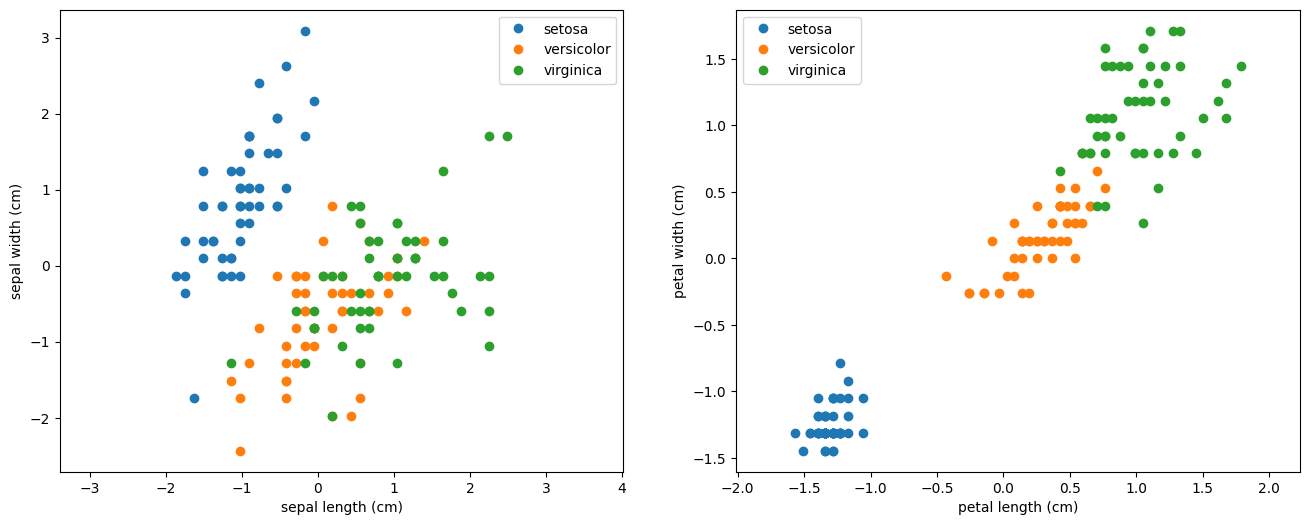

In [24]:
# We can visualize the dataset before training

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# enumerate picks up both the index (0, 1, 2) and the element ('setosa', 'versicolor', 'virginica') from "names"
# loop 1: target = 0, target_name = 'setosa'
# loop 2: target = 1, target_name = 'versicolor' etc

for target, target_name in enumerate(names):

    # Subset the rows of X_train that fall into each flower category using boolean mapping
    X_plot = X_train[y_train == target]

    # Plot the sepal length versus sepal width for the flower category
    ax1.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)

# Label the plot
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend()

# Repeat the above process but with petal length versus petal width
for target, target_name in enumerate(names):

    X_plot = X_train[y_train == target]

    ax2.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)

ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend()

## Define Model

In [25]:
class irisClassification(torch.nn.Module):

    def __init__(self, input_dim, output_dim):

        super(irisClassification, self).__init__()

        self.layer1 = torch.nn.Linear(input_dim, 1)
        self.layer2 = torch.nn.Linear(1, output_dim)

    def forward(self, x):

        hidden = self.layer1(x)
        out = self.layer2(hidden)

        return out

## Define Hyperparameters

In [26]:
model = irisClassification(input_dim = 4, output_dim = 1)

learning_rate = 0.03 # YOUR CODE HERE
epochs  = 49 # YOUR CODE HERE, This has to be <50

# We will use gradient descent for our optimizer and Mean Squared Error Loss function
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

## Identify Tracked Values

In [27]:
# follow models performance over each epoch. Identify a metric and track it over epochs

# YOUR CODE HERE

train_loss_list = []

## Train Model

In [28]:
x_train_t = torch.from_numpy(X_train).float()
y_train_t = torch.from_numpy(y_train).float()
y_train_t = y_train_t.view((len(y_train), 1))

for epoch in range(epochs):

    # YOUR CODE HERE

    optimizer.zero_grad()

    y_output = (model(x_train_t))

    loss = loss_func(y_output, y_train_t)

    train_loss_list.append(loss.item())

    loss.backward()

    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 3.3848302364349365
epoch 1, loss 3.0537936687469482
epoch 2, loss 2.7589235305786133
epoch 3, loss 2.4957046508789062
epoch 4, loss 2.260150671005249
epoch 5, loss 2.0487427711486816
epoch 6, loss 1.8583813905715942
epoch 7, loss 1.6863455772399902
epoch 8, loss 1.5302605628967285
epoch 9, loss 1.3880726099014282
epoch 10, loss 1.2580301761627197
epoch 11, loss 1.1386667490005493
epoch 12, loss 1.028785228729248
epoch 13, loss 0.927443265914917
epoch 14, loss 0.8339300751686096
epoch 15, loss 0.7477414011955261
epoch 16, loss 0.6685431599617004
epoch 17, loss 0.5961284637451172
epoch 18, loss 0.5303688645362854
epoch 19, loss 0.4711623191833496
epoch 20, loss 0.41838574409484863
epoch 21, loss 0.3718557357788086
epoch 22, loss 0.3313041031360626
epoch 23, loss 0.29636889696121216
epoch 24, loss 0.26660215854644775
epoch 25, loss 0.24149012565612793
epoch 26, loss 0.22048072516918182
epoch 27, loss 0.20301371812820435
epoch 28, loss 0.18854761123657227
epoch 29, loss 0.176

## Visualize and Evaluate Model

Text(0, 0.5, 'Loss')

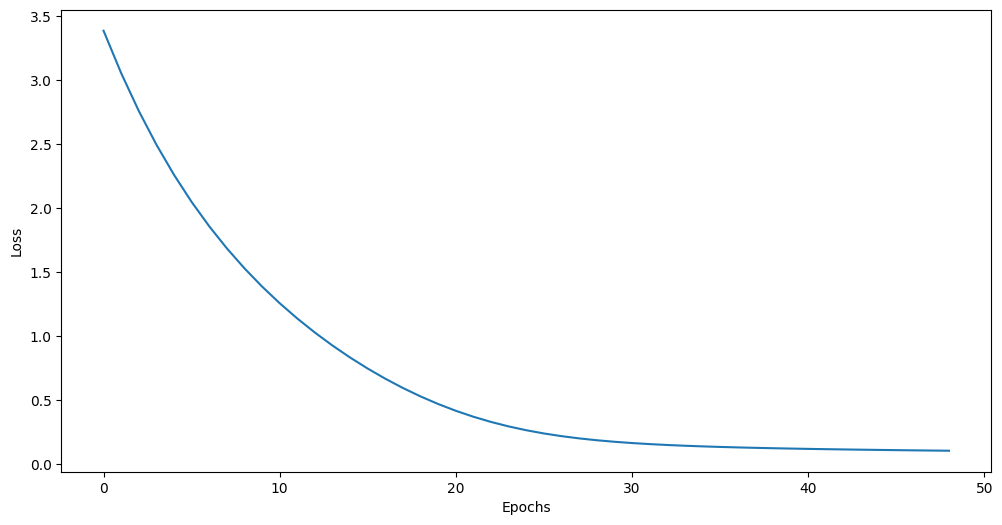

In [29]:
# Plot your training loss throughout the training
# Include proper x and y labels for the plot

plt.figure(figsize=(12, 6))

# YOUR CODE HERE

plt.plot(train_loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [30]:
# Confirm that your model's training accuracy is >90%

with torch.no_grad():

    # Compare your model predictions with targets (y_train) to compute the training accuracy
    # YOUR CODE HERE
    predicted = model(x_train_t).numpy()

# Training accuracy = (# of correct predictions) / (total # of training samples)
# You can round the model predictions to integer (e.g. 0.34 -> 0, 1.78 -> 2)

# YOUR CODE HERE
rounded = np.rint(predicted)
y_train = y_train[:, None]

number_correct = np.sum(rounded == y_train)

print('accuracy: {}'.format(number_correct/np.size(rounded)))

accuracy: 0.88


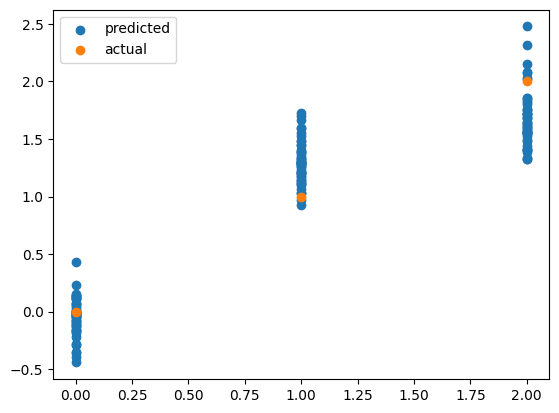

In [33]:
fig, ax3 = plt.subplots()
ax3.scatter(y_train, predicted, label="predicted")
ax3.scatter([0, 1, 2], [0, 1, 2], label="actual")
ax3.legend()